In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [385]:
raw_data = pd.read_csv('data_files/train.csv')

In [386]:
#General Overview of the training data
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [387]:
#Analyzing Data by its Column, Non-Null Count, and  Datype 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [388]:
#Generate statistical overview of the training data
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


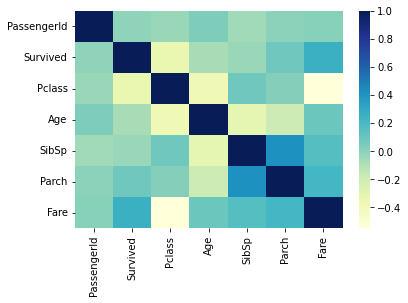

In [389]:
#Heatmap of the training data to determine and visualize correlations
sns.heatmap(raw_data.corr(), cmap="YlGnBu")
plt.show()

In [390]:
#StratifiedShuffleSplit to reduce randomness by making the defined columns have an equal ratio in the data set
from sklearn.model_selection import StratifiedShuffleSplit as ssp

split = ssp(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(raw_data, raw_data[['Survived','Pclass','Sex']]):
    ssp_train_data = raw_data.loc[train_indices]
    ssp_test_data = raw_data.loc[test_indices]
    



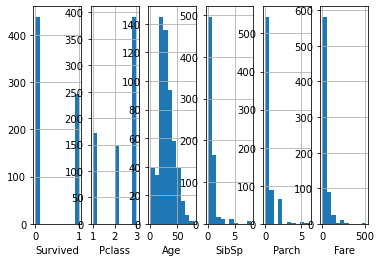

In [391]:
#historgram of the training data
plt.subplot(1,6,1)
ssp_train_data['Survived'].hist()
plt.xlabel("Survived")

plt.subplot(1,6,2)
ssp_train_data['Pclass'].hist()
plt.xlabel("Pclass")

plt.subplot(1,6,3)
ssp_train_data['Age'].hist()
plt.xlabel("Age")

plt.subplot(1,6,4)
ssp_train_data['SibSp'].hist()
plt.xlabel("SibSp")

plt.subplot(1,6,5)
ssp_train_data['Parch'].hist()
plt.xlabel("Parch")

plt.subplot(1,6,6)
ssp_train_data['Fare'].hist()
plt.xlabel("Fare")

plt.show()

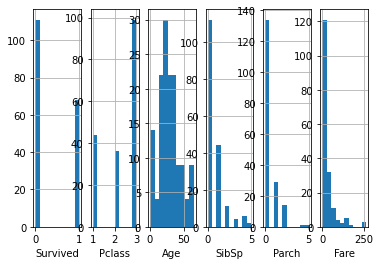

In [392]:
#historgram of the test data
plt.subplot(1,6,1)
ssp_test_data['Survived'].hist()
plt.xlabel("Survived")

plt.subplot(1,6,2)
ssp_test_data['Pclass'].hist()
plt.xlabel("Pclass")

plt.subplot(1,6,3)
ssp_test_data['Age'].hist()
plt.xlabel("Age")

plt.subplot(1,6,4)
ssp_test_data['SibSp'].hist()
plt.xlabel("SibSp")

plt.subplot(1,6,5)
ssp_test_data['Parch'].hist()
plt.xlabel("Parch")

plt.subplot(1,6,6)
ssp_test_data['Fare'].hist()
plt.xlabel("Fare")

plt.show()

In [393]:
#overview of the data after split
ssp_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 828 to 151
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


# Preparing the Data

In [394]:
 #Estimate and Assign Values to NaN Values

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
        

In [395]:
#Convert text data into binary data of the selected features
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C','S','Q','N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ['Female','Male']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [396]:
#Remove unnecessary column of features
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'], axis=1, errors = 'ignore')

In [397]:
#Creating a pipeline based on the functions made
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', AgeImputer()),
                     ('featureencoder', FeatureEncoder()),
                     ('featuredropper', FeatureDropper())])

In [398]:
#Running the data through the pipeline
ssp_train_data = pipeline.fit_transform(ssp_train_data)

In [399]:
#Transformed data
ssp_train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
828,829,1,3,29.925009,0,0,7.75,0.0,1.0,0.0,0.0,1.0
80,81,0,3,22.000000,0,0,9.00,0.0,0.0,1.0,0.0,1.0
668,669,0,3,43.000000,0,0,8.05,0.0,0.0,1.0,0.0,1.0
90,91,0,3,29.000000,0,0,8.05,0.0,0.0,1.0,0.0,1.0
513,514,1,1,54.000000,1,0,59.40,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,0,2,36.500000,0,2,26.00,0.0,0.0,1.0,0.0,1.0
181,182,0,2,29.925009,0,0,15.05,1.0,0.0,0.0,0.0,1.0
226,227,1,2,19.000000,0,0,10.50,0.0,0.0,1.0,0.0,1.0
88,89,1,1,23.000000,3,2,263.00,0.0,0.0,1.0,1.0,0.0


In [450]:
ssp_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 828 to 151
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [401]:
#Resize the distribution of values
from sklearn.preprocessing import StandardScaler

X = ssp_train_data.drop(['Survived'], axis=1)
y = ssp_train_data['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


# Random Forest Classifier

In [402]:
#Choosing the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

#Hyperparameter Tuning
param_grid = [
    {'n_estimators': [10, 100, 450, 550], 'max_depth': [None, 5, 10],'min_samples_split': [2,3,4]}
]

rf_grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
rf_grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 450, 550]}],
             return_train_score=True, scoring='accuracy')

In [403]:
rf_clf_final = rf_grid_search.best_estimator_

In [404]:
rf_clf_final

RandomForestClassifier(max_depth=5, n_estimators=450)

In [405]:
#fit_transform test data
ssp_test_data = pipeline.fit_transform(ssp_test_data)

In [451]:
rf_X_test = ssp_test_data.drop(['Survived'], axis=1)
rf_y_test = ssp_test_data['Survived']

scaler = StandardScaler()
rf_X_test = scaler.fit_transform(rf_X_test)
rf_y_test = rf_y_test.to_numpy()

In [452]:
#Evaluating Model
rf_clf_final.score(rf_X_test, rf_y_test)

0.8212290502793296

In [453]:
final_data = pipeline.fit_transform(raw_data)

In [454]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [455]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    float64
 8   S            891 non-null    float64
 9   Q            891 non-null    float64
 10  Female       891 non-null    float64
 11  Male         891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [456]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_final = scaler.fit_transform(X_final)
y_final = y_final.to_numpy()

In [457]:
rf_clf2 = RandomForestClassifier()

param_grid = [
    {'n_estimators': [10, 100, 450, 550], 'max_depth': [None, 5, 10],'min_samples_split': [2,3,4]}
]

grid_search = GridSearchCV(rf_clf2, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_final, y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 450, 550]}],
             return_train_score=True, scoring='accuracy')

In [458]:
final_rf_clf2 = grid_search.best_estimator_

In [459]:
final_rf_clf2

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=550)

In [415]:
test_final = pd.read_csv('data_files/test.csv')
test_final = pipeline.fit_transform(test_final)

In [416]:
test_final


,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [417]:
test_final=test_final.fillna(method='ffill')

scaler = StandardScaler()
X_test_final=scaler.fit_transform(test_final)

In [423]:
rf_predictions = final_rf_clf2.predict(X_test_final)

In [424]:
rf_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [420]:
data_frame = pd.DataFrame(test_final['PassengerId'])
data_frame['Survived']=predictions
data_frame.to_csv('data_files/rfcpredictions.csv')

In [427]:
data_frame

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [428]:
final_rf_clf2.score(X_final, y_final)

0.9719416386083053

In [441]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear') # Linear Kernel
svm_clf.fit(X_final, y_final)

SVC(kernel='linear')

In [442]:

svm_clf.score(X_final, y_final)

0.7867564534231201

In [444]:
svm_predictions = svm_clf.predict(X_test_final)

In [445]:
svm_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,